Description
---------
This is a test of SimulatedAnnealing.

Basics
------

In [1]:
import sys
sys.path.append('../sample/')
from simulated_annealing import Temperature, SimulatedAnnealing

from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt

### Set Parameters

`State` in MetropolisSampler is `np.array([float])`.

**The smaller the `re_scaling` be, the faster it anneals.**

In [96]:
def temperature_of_time(t, re_scaling, max_temperature):
    """ int * int -> float
    """
    
    return max_temperature / (1 + np.exp(t / re_scaling))


def initialize_state():
    """ None -> [float]
    """    
    return np.array([uniform(-10, 10) for i in range(dim)])


def markov_process(x, step_length):
    """ [float] -> [float]
    """
    
    result = x.copy()
    
    for i, item in enumerate(result):
        
        result[i] = item + gauss(0, 1) * step_length  
    
    return result

### Create SimulatedAnnealing Object

In [97]:
def get_sa(dim, iterations, re_scaling, max_temperature, step_length):
    
    sa = SimulatedAnnealing(
            lambda i: temperature_of_time(i, re_scaling, max_temperature),
            iterations, initialize_state,
            lambda x: markov_process(x, step_length)
            )
    
    return sa

### Target Function on Arbitrary Dimension

In [4]:
def N(mu, sigma):
    """ float * float -> ([float] -> float)
    """
    return lambda x: np.exp(- np.sum(np.square((x - mu) / sigma)))


## Recall SimulatedAnnealing is searching the argmin, instead of argmax.
def target_function(x):
    """ [float] -> float
    """
    return -1 * (N(0, 5)(x) + 100 * N(10, 3)(x))

Test on 1-Dim
---------

In [98]:
dim = 1

## Needs tuning
iterations = int(10 ** 3)
re_scaling = int(iterations / 10)
max_temperature = 1000
step_length = 1

sa = get_sa(dim, iterations, re_scaling, max_temperature, step_length)

Get argmin

In [99]:
argmin = sa(target_function)
print('argmin = {0}'.format(argmin))
print('target(argmin) = {0}, which shall be about -100'.format(target_function(argmin)))

accept-ratio = 0.323
argmin = [ 9.95667729]
target(argmin) = -99.99810833511802, which shall be about -100


../sample/simulated_annealing.py:68: RuntimeWarning: overflow encountered in exp
  return np.exp(-1 * target_function(state) / temperature())
../sample/metropolis_sampler.py:35: RuntimeWarning: invalid value encountered in double_scalars
  alpha = target_distribution(next_state) / target_distribution(init_state)


Plot the MCMC

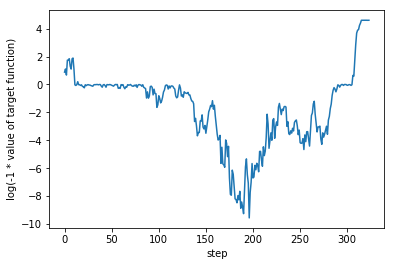

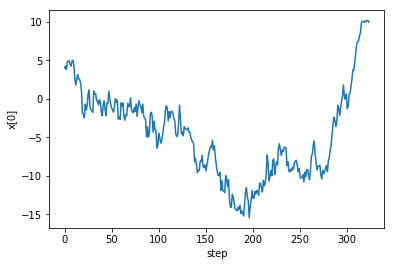

In [100]:
def t(x):
    return np.log(-1 * target_function(x))

step_list = np.arange(len(sa.chain))
t_lst = [t(_) for _ in sa.chain]


plt.plot(step_list, t_lst)
plt.xlabel('step')
plt.ylabel('log(-1 * value of target function)')
plt.show()


for i in range(dim):
    
    x_lst = [_[i] for _ in sa.chain]

    plt.plot(step_list, x_lst)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(i))
    plt.show()

### Conclusion

Splendid.

Test on 2-Dim
---------

In [101]:
dim = 2

## Needs tuning
iterations = int(10 ** 3)
re_scaling = int(iterations / 10)
max_temperature = 1000
step_length = 1

sa = get_sa(dim, iterations, re_scaling, max_temperature, step_length)

Get argmin

In [111]:
argmin = sa(target_function)
print('argmin = {0}'.format(argmin))
print('target(argmin) = {0}, which shall be about -100'.format(target_function(argmin)))

accept-ratio = 0.223
argmin = [ 10.26492834  10.08530508]
target(argmin) = -99.1432352915566, which shall be about -100


../sample/simulated_annealing.py:68: RuntimeWarning: overflow encountered in exp
  return np.exp(-1 * target_function(state) / temperature())
../sample/metropolis_sampler.py:35: RuntimeWarning: invalid value encountered in double_scalars
  alpha = target_distribution(next_state) / target_distribution(init_state)


Plot the MCMC

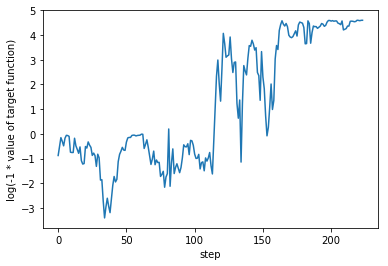

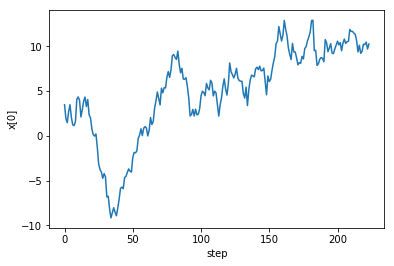

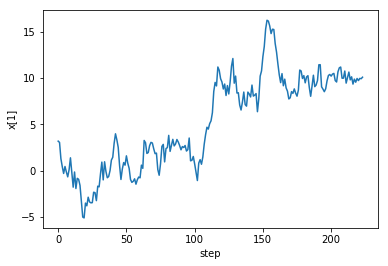

In [112]:
def t(x):
    return np.log(-1 * target_function(x))

step_list = np.arange(len(sa.chain))
t_lst = [t(_) for _ in sa.chain]


plt.plot(step_list, t_lst)
plt.xlabel('step')
plt.ylabel('log(-1 * value of target function)')
plt.show()


for i in range(dim):
    
    x_lst = [_[i] for _ in sa.chain]

    plt.plot(step_list, x_lst)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(i))
    plt.show()

### Conclusion

Splendid.

Test on 4-Dim
---------

In [227]:
dim = 4

## Needs tuning
iterations = int(10 ** 6)
re_scaling = int(iterations / 100)
max_temperature = 1000
step_length = 3

sa = get_sa(dim, iterations, re_scaling, max_temperature, step_length)

Get argmin

In [228]:
argmin = sa(target_function)
print('argmin = {0}'.format(argmin))
print('target(argmin) = {0}, which shall be about -100'.format(target_function(argmin)))

accept-ratio = 1.0
argmin = [ 1071.78249475  3311.77890841   398.09827239 -3522.74643613]
target(argmin) = -0.0, which shall be about -100


In [229]:
p = np.argmin([target_function(_) for _ in sa.chain])
argmin = sa.chain[p]
print(argmin)

[-4.50064896  5.55315397  4.53323621  4.58453631]


Plot the MCMC

/Users/shuiruge/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


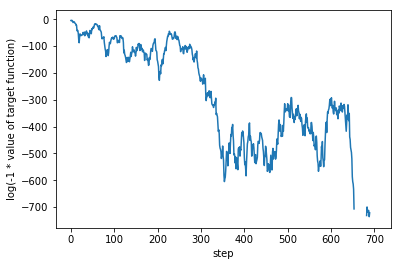

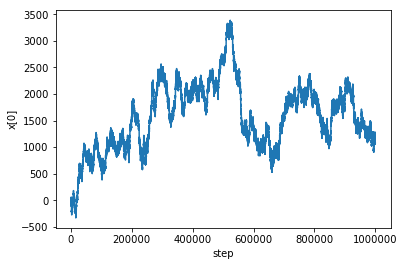

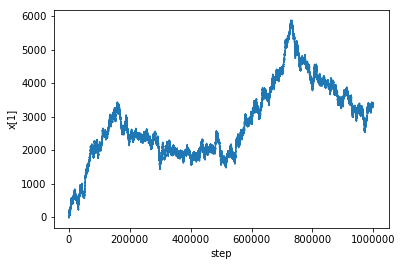

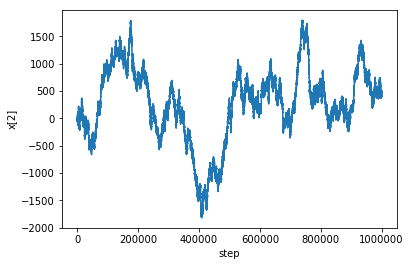

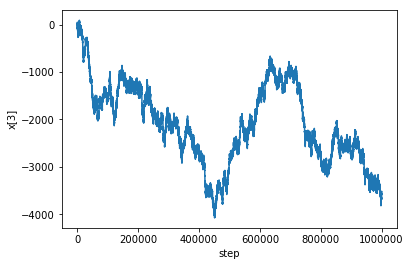

In [230]:
def t(x):
    return np.log(-1 * target_function(x))

step_list = np.arange(len(sa.chain))
t_lst = [t(_) for _ in sa.chain]


plt.plot(step_list, t_lst)
plt.xlabel('step')
plt.ylabel('log(-1 * value of target function)')
plt.show()


for i in range(dim):
    
    x_lst = [_[i] for _ in sa.chain]

    plt.plot(step_list, x_lst)
    plt.xlabel('step')
    plt.ylabel('x[{0}]'.format(i))
    plt.show()

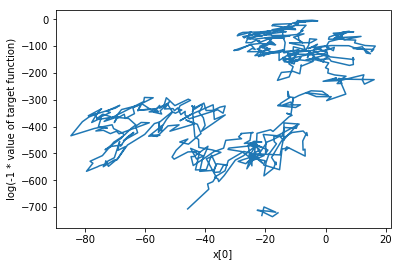

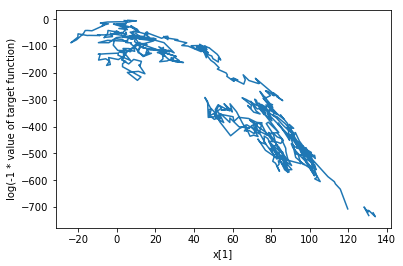

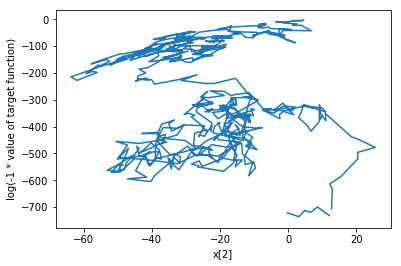

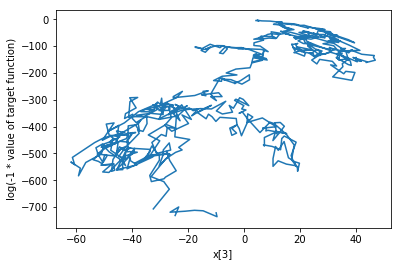

In [231]:
for axis_to_plot in range(dim):

    x_lst = [_[axis_to_plot] for _ in sa.chain]
    
    plt.plot(x_lst, t_lst)
    plt.xlabel('x[{0}]'.format(axis_to_plot))
    plt.ylabel('log(-1 * value of target function)')
    plt.show()

### Conclusion

As the dimension increases, the accept-ratio also increaes. That is, for a random move in the Markov process, the new value of target function is almost always greater than that of the temporal. So, we wonder **why the greater dimenson triggers the greater value of the new value of target function in the random move?**

The reason of so is that a random move has more probability of making `sum([x[i] for i in range(dim)])` invariant as the `dim` increases.